In [32]:
import tensorflow
from tensorflow import keras

In [33]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [34]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Cotton_disease/train_/train'
valid_path = '/content/drive/My Drive/Cotton_disease/test_/test'

In [35]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [36]:
for layer in inception.layers:
    layer.trainable = False

In [37]:
folders = glob('/content/drive/My Drive/Cotton_disease/train_/train/*')

In [38]:
folders

['/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton plant',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton plant',
 '/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton leaf',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton leaf']

In [39]:
x = Flatten()(inception.output)

In [40]:
prediction = Dense(len(folders), activation='softmax')(x)


In [41]:
model = Model(inputs=inception.input, outputs=prediction)

In [42]:

# view the structure of the model
model.summary()

Model: "functional_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [43]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Cotton_disease/train_/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [46]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Cotton_disease/test_/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [47]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 39s 635ms/step - loss: 2.6800 - accuracy: 0.7145 - val_loss: 0.2450 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 35s 571ms/step - loss: 0.5050 - accuracy: 0.9016 - val_loss: 0.0598 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 35s 573ms/step - loss: 0.3748 - accuracy: 0.9226 - val_loss: 1.1986 - val_accuracy: 0.7222
Epoch 4/20
61/61 [==============================] - 35s 571ms/step - loss: 0.5563 - accuracy: 0.9006 - val_loss: 0.0775 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 35s 567ms/step - loss: 0.5768 - accuracy: 0.9134 - val_loss: 0.2711 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 35s 569ms/step - loss: 0.3916 - accuracy: 0.9339 - val_loss: 0.3353 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 35s 568ms/step - loss: 0.4268 - accuracy: 0.9390 - val_loss: 0.1683 - val_accuracy: 0.9444

In [48]:
from tensorflow.keras.models import load_model

model.save('inceptionv3.h5')

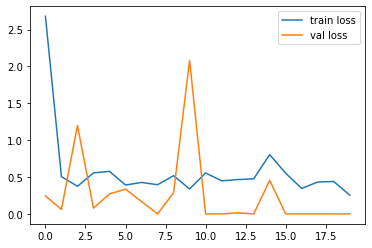

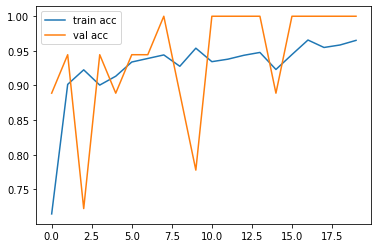

<Figure size 432x288 with 0 Axes>

In [49]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')